Problem 2: CART-RF-ANN
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv(r'C:\Users\Mathesh R\Downloads\insurance_part2_data.csv')

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


Data Dictionary:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10.Age of insured (Age)

In [4]:
df.shape

(3000, 10)

The dataset has 3000 rows and 10 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


The dataset has 6 object datatypes,2 Integer datatypes and 2 float datatypes.

In [6]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

The data set has nill null values.

In [6]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


The commission received for tour insurance firm (Commission is in percentage of sales) varies from 0 to 210. 
The age of insured varies from 8 to 84 years old.
Duration of the tour (Duration in days) ranges from -1 to 4580 days.
Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s) varies from 0 rupees to 53900 rupess

In [7]:
dups=df.duplicated().sum()
dups

139

In [8]:
dups1=df[df.duplicated()]
dups1

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(2861, 10)

There are 139 duplicates in the dataset.

In [11]:
#Treating anamolies
df[df['Duration'] < 1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.30,Online,-1,18.00,Bronze Plan,ASIA
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA


As Duration cannot be negative or null, it is replaced with the median value.

In [12]:
df['Duration'] = df['Duration'].replace(0,df['Duration'].median())
df['Duration'] = df['Duration'].replace(-1,df['Duration'].median())


In [13]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [14]:
df_object=df.select_dtypes(include = ['object'])

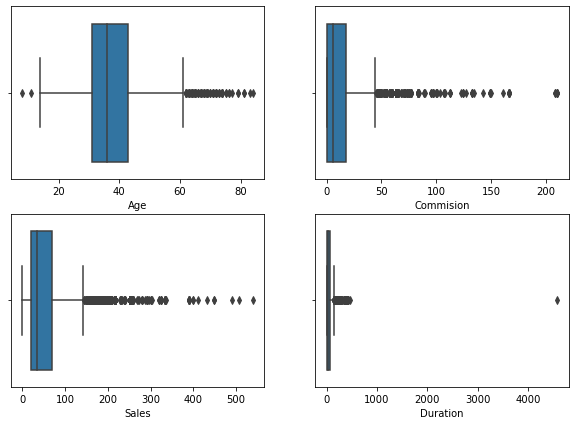

In [15]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,7)

sns.boxplot(x='Age', data=df, ax=axes[0][0])

sns.boxplot(x='Commision', data=df , ax=axes[0][1])

sns.boxplot(x='Sales', data=df, ax=axes[1][0])

sns.boxplot(x='Duration', data=df , ax=axes[1][1])
plt.show()

2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [16]:
def boplot(columns): 
 plt.figure(figsize=(10,7))
 plt.title('BOXPLOT:' + columns)
 sns.boxplot(data= df,x=columns)
 plt.show

In [17]:
def hplot(columns): 
 plt.figure(figsize=(10,7))
 plt.title('HISTPLOT:' + columns)
 sns.histplot(data=  df,x=columns,kde=True)
 plt.show

a)Univariate Analysis

In [15]:
df['Agency_Code'].value_counts()

EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

Code of tour firm are EPX,C2B,CWT and JZI.

In [16]:
df['Type'].value_counts()

Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64

Type of tour insurance firms (Type) are Travel Agency and Airlines.

In [17]:
df['Claimed'].value_counts()

No     1947
Yes     914
Name: Claimed, dtype: int64

In [18]:
df['Claimed'].value_counts(normalize=True)

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64

In [19]:
df.shape

(2861, 10)

The target variable 'claimed' tells the number of persons who availed the insurance. It tells 914 out of 2861 customers claimed insurance benefits which is nearly 32 percent of insurers.

In [20]:
df['Channel'].value_counts()

Online     2815
Offline      46
Name: Channel, dtype: int64

In [21]:
df['Channel'].value_counts(normalize=True)

Online     0.983922
Offline    0.016078
Name: Channel, dtype: float64

Almost 98 percent of the tour insurance agencies had distribution channel through ONLINE mode.

In [22]:
df['Product Name'].value_counts()

Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64

There are four variants of tour insurance products namely Customised Plan,Cancellation Plan,Bronze Plan,Silver Plan and Gold Plan. Out of this, Customised plan is widely preferred.

In [23]:
df['Destination'].value_counts()

ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64

The dataset contains three set of Destination of the tour namely ASIA,Americas and EUROPE. Most preferred destination is ASIA.

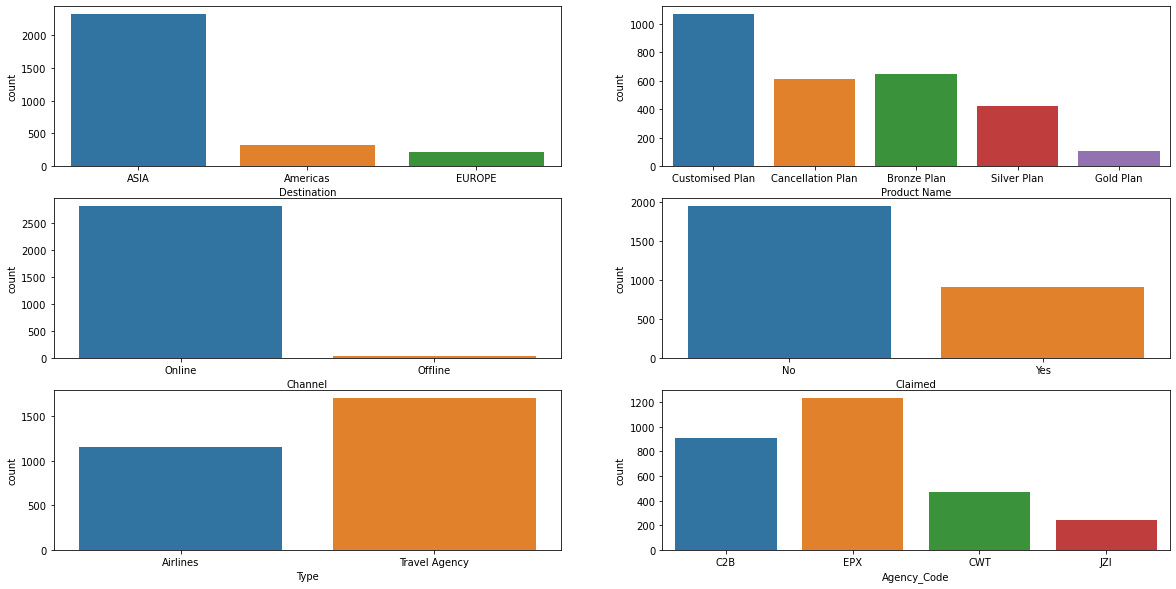

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
sns.countplot( x='Destination',data=df)
plt.subplot(3,2,2)
sns.countplot( x='Product Name',data=df)
plt.subplot(3,2,3)
Y5=sns.countplot(  x='Channel',data=df)
plt.subplot(3,2,4)
Y4=sns.countplot( x='Claimed',data=df)
plt.subplot(3,2,5)
Y3=sns.countplot( x='Type',data=df)
plt.subplot(3,2,6)
ax = sns.countplot( x='Agency_Code',data=df)


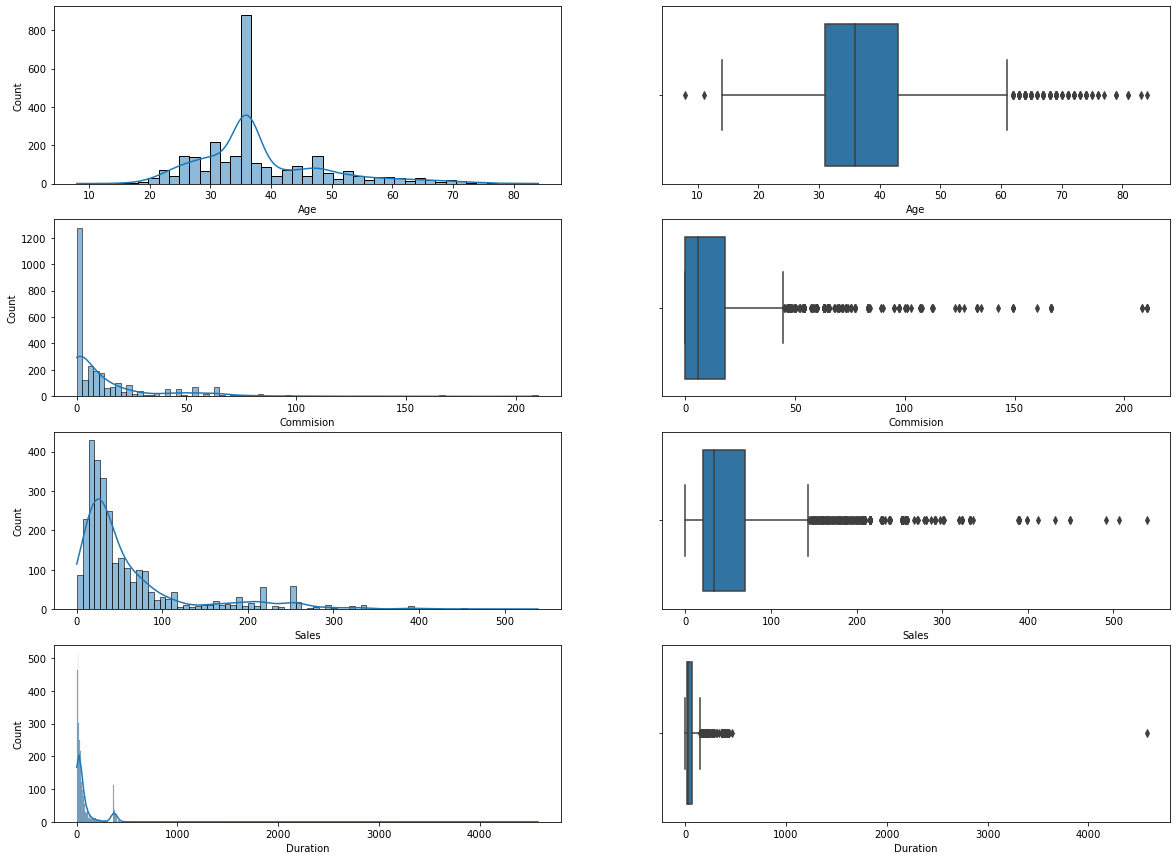

In [34]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,15)
sns.histplot(df['Age'], kde=True, ax=axes[0][0])
sns.boxplot(x='Age', data=df, ax=axes[0][1])
sns.histplot(df['Commision'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Commision', data=df , ax=axes[1][1])
sns.histplot(df['Sales'], kde=True, ax=axes[2][0])
sns.boxplot(x='Sales', data=df, ax=axes[2][1])
sns.histplot(df['Duration'] , kde=True, ax=axes[3][0])
sns.boxplot(x='Duration', data=df , ax=axes[3][1])
plt.show()

a)Age: 



In [28]:
df['Age'].describe()

count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64

b)Commision

In [41]:
df['Commision'].describe()

count    2861.000000
mean       15.080996
std        25.826834
min         0.000000
25%         0.000000
50%         5.630000
75%        17.820000
max       210.210000
Name: Commision, dtype: float64

Sales

In [30]:
df['Sales'].describe()

count    2861.000000
mean       61.757878
std        71.399740
min         0.000000
25%        20.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64

Duration

In [31]:
df['Duration'].describe()

count    2861.000000
mean       72.149948
std       135.964455
min         1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64

b)Bi variate

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

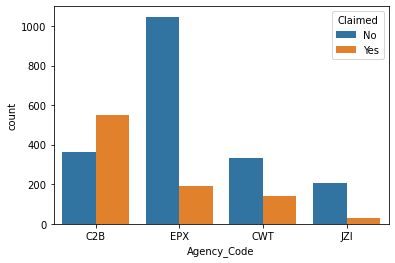

In [227]:
sns.countplot(data=df,x='Agency_Code',hue='Claimed')

<AxesSubplot:xlabel='Type', ylabel='count'>

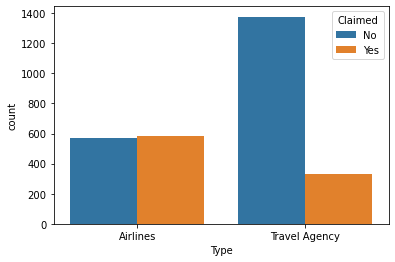

In [218]:
sns.countplot(data=df,x='Type',hue='Claimed')

<AxesSubplot:xlabel='Age', ylabel='Claimed'>

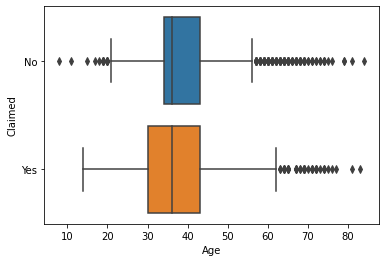

In [220]:
sns.boxplot(data=df,x='Age',y='Claimed')

<AxesSubplot:xlabel='Sales', ylabel='Claimed'>

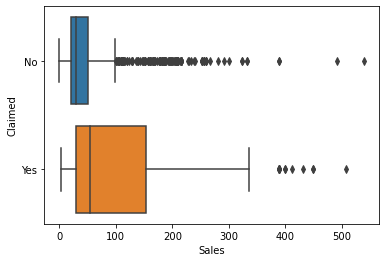

In [222]:
sns.boxplot(data=df,x='Sales',y='Claimed')

<AxesSubplot:xlabel='Duration', ylabel='Claimed'>

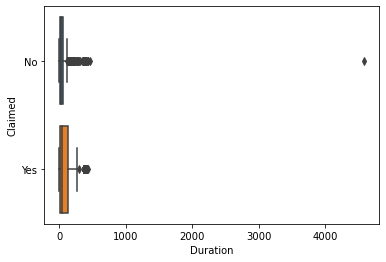

In [223]:
sns.boxplot(data=df,x='Duration',y='Claimed')

<AxesSubplot:xlabel='Destination', ylabel='count'>

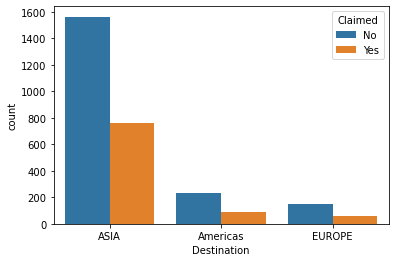

In [224]:
sns.countplot(data=df,x='Destination',hue='Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='count'>

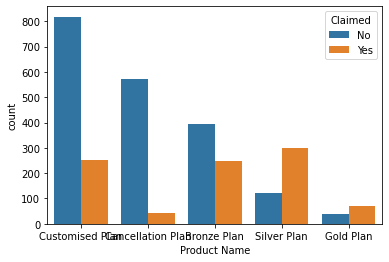

In [233]:
sns.countplot(data=df,x='Product Name',hue='Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

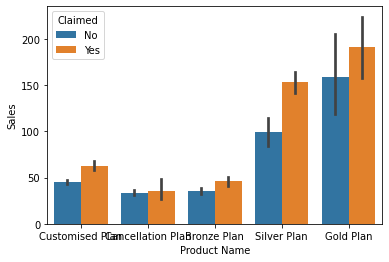

In [230]:
sns.barplot(data=df,x='Product Name',y='Sales',hue='Claimed')

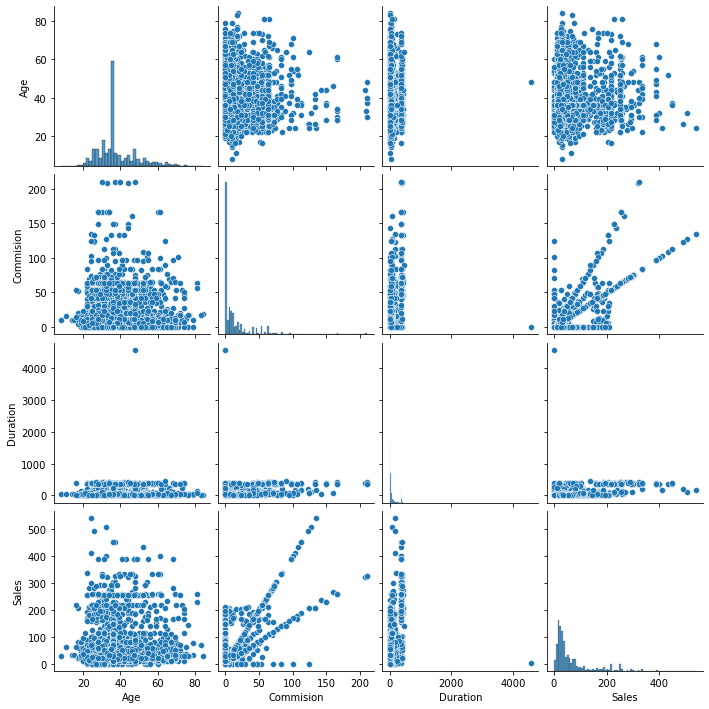

In [43]:
sns.pairplot(df)
plt.savefig('kn.png')
plt.show()

In [44]:
corr = df.corr(method='pearson')

C:\Users\Mathesh R\AppData\Local\Temp\ipykernel_17708\4046424289.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


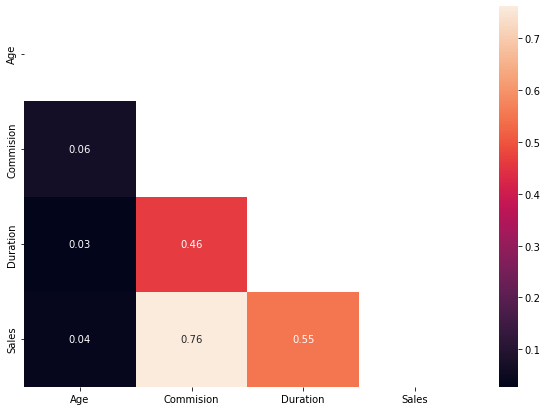

In [46]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


In [19]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [20]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.5 KB


In [22]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [47]:
# capture the target column ("Claimed") into separate vectors for training set(x) and test set(y)

X = df.drop("Claimed" , axis=1)

y = df.pop("Claimed")

KeyError: "['Claimed'] not found in axis"

In [24]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Commision     2861 non-null   float64
 4   Channel       2861 non-null   int8   
 5   Duration      2861 non-null   int64  
 6   Sales         2861 non-null   float64
 7   Product Name  2861 non-null   int8   
 8   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(5)
memory usage: 125.7 KB


In [26]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [27]:
# Checking dimensions on the train and test data
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',train_labels.shape)
print('y_test: ', test_labels.shape)

X_train:  (2002, 9)
X_test:  (859, 9)
y_train:  (2002,)
y_test:  (859,)


In [28]:
#Decision tree
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [29]:
#Fit the model with training data
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [30]:
from sklearn import tree

train_char_label = ['0', '1']
Credit_Tree_File = open(r'C:\Users\Mathesh R\anaconda3.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [31]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.193771
Agency_Code   0.171509
Type          0.000000
Commision     0.071561
Channel       0.003908
Duration      0.272426
Sales         0.226131
Product Name  0.031920
Destination   0.028774


Type variable was never considered for splitting.Here the duration variable is given utmost importance.

In [74]:
#reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 6,min_samples_leaf=30,min_samples_split=90)
#reg_dt_model.fit(X_train, train_labels)

In [75]:
#credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
#dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

#credit_tree_regularized.close()

#print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

In [279]:
#ytrain_predict = reg_dt_model.predict(X_train)
#ytest_predict = reg_dt_model.predict(X_test)

In [280]:
#ytrain_predict2 = reg_dt_model.predict_proba(X_train)
#ytest_predict2 = reg_dt_model.predict_proba(X_test)

In [281]:
#ytrain_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [84]:
#ytrain_predict2

array([[1.        , 0.        ],
       [0.68711656, 0.31288344],
       [0.17808219, 0.82191781],
       ...,
       [0.68711656, 0.31288344],
       [0.9375    , 0.0625    ],
       [0.34810127, 0.65189873]])

It means that for the first row, the probability of being 0 is 96 %.

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid_d = {
    'criterion':['gini'],
    'random_state':[1],
    'max_depth': [6,7,8],
    'min_samples_leaf': [20, 30],
    'min_samples_split': [70, 80]
}

rfcl_d = DecisionTreeClassifier()

grid_search_d = GridSearchCV(estimator = rfcl_d, param_grid = param_grid_d, cv = 3)

In [33]:
grid_search_d.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [6, 7, 8],
                         'min_samples_leaf': [20, 30],
                         'min_samples_split': [70, 80], 'random_state': [1]})

In [34]:
grid_search_d.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 30,
 'min_samples_split': 70,
 'random_state': 1}

In [35]:
best_grid_d = grid_search_d.best_estimator_

In [36]:
best_grid_d

DecisionTreeClassifier(max_depth=6, min_samples_leaf=30, min_samples_split=70,
                       random_state=1)

In [48]:
print (pd.DataFrame(best_grid_d.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.016430
Agency_Code   0.528585
Type          0.000000
Commision     0.051875
Channel       0.000000
Duration      0.065233
Sales         0.277889
Product Name  0.041689
Destination   0.018299


In [37]:
ytrain_predict_d = best_grid_d.predict(X_train)
ytest_predict_d = best_grid_d.predict(X_test)

In [38]:
ytrain_predict_d1 = best_grid_d.predict_proba(X_train)
ytest_predict_d1 = best_grid_d.predict_proba(X_test)

In [39]:
ytrain_predict_d

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [40]:
ytrain_predict_d1

array([[0.775     , 0.225     ],
       [0.62416107, 0.37583893],
       [0.74285714, 0.25714286],
       ...,
       [0.92771084, 0.07228916],
       [0.85714286, 0.14285714],
       [0.6031746 , 0.3968254 ]])

In [41]:
import matplotlib.pyplot as plt

AUC: 0.829


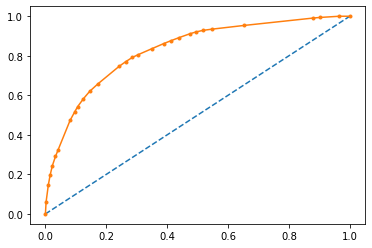

In [42]:
# predict probabilities
probs = best_grid_d.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.788


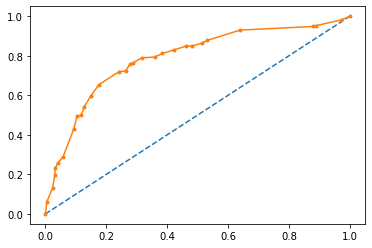

In [43]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_d.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(train_labels, ytrain_predict_d))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1359
           1       0.71      0.54      0.61       643

    accuracy                           0.78      2002
   macro avg       0.76      0.72      0.73      2002
weighted avg       0.77      0.78      0.77      2002



In [46]:
print(classification_report(test_labels, ytest_predict_d))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       588
           1       0.66      0.50      0.57       271

    accuracy                           0.76       859
   macro avg       0.73      0.69      0.70       859
weighted avg       0.75      0.76      0.75       859



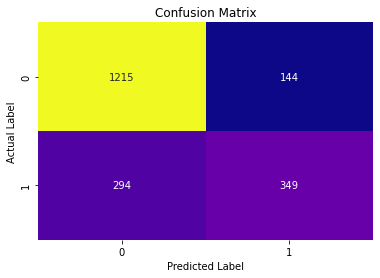

In [118]:
confusion_matrix(train_labels, ytrain_predict_d)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_d),annot=True, fmt='d',cbar=False, cmap='plasma')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

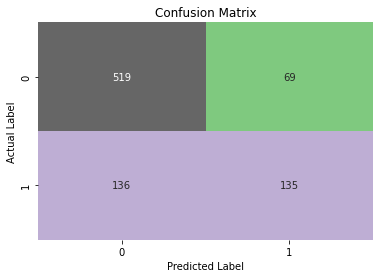

In [123]:
confusion_matrix(test_labels, ytest_predict_d)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_d),annot=True, fmt='d',cbar=False, cmap='Accent')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

##b)Random Forest

In [49]:
rfcl = RandomForestClassifier(n_estimators = 501,oob_score=True,max_depth=6,random_state=1,max_features=9,min_samples_leaf=30,min_samples_split=90)
rfcl = rfcl.fit(X_train, train_labels)

In [50]:
rfcl.oob_score_

0.7622377622377622

the accuracy is 75.The error rate of this model is 1-0.75=25 percentage.

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'random_state':[1],
    'max_depth': [6,7,8],
    'max_features': [7,8,9],
    'min_samples_leaf': [20, 30],
    'min_samples_split': [60,70,80, 90],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [54]:
grid_search.fit(X_train, train_labels)

KeyboardInterrupt: 

In [55]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 7,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 501,
 'random_state': 1}

In [56]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, max_features=7, min_samples_leaf=20,
                       min_samples_split=60, n_estimators=501, random_state=1)

In [57]:
best_grid = grid_search.best_estimator_

In [58]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.046401
Agency_Code   0.401459
Type          0.004249
Commision     0.073520
Channel       0.000120
Duration      0.067459
Sales         0.218324
Product Name  0.179923
Destination   0.008545


In [135]:
ytrain_predict_r = best_grid.predict(X_train)
ytest_predict_r = best_grid.predict(X_test)

In [136]:
ytrain_predict_r1 = best_grid.predict_proba(X_train)
ytest_predict_r1 = best_grid.predict_proba(X_test)

In [137]:
ytrain_predict_r1

array([[0.7923782 , 0.2076218 ],
       [0.7534688 , 0.2465312 ],
       [0.76886143, 0.23113857],
       ...,
       [0.95079101, 0.04920899],
       [0.72685073, 0.27314927],
       [0.68377058, 0.31622942]])

In [138]:
ytest_predict_r1

array([[0.53891467, 0.46108533],
       [0.91821508, 0.08178492],
       [0.31124452, 0.68875548],
       ...,
       [0.53969669, 0.46030331],
       [0.9196647 , 0.0803353 ],
       [0.75984563, 0.24015437]])

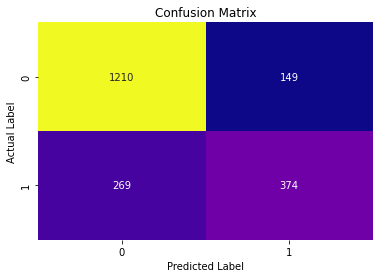

In [155]:
confusion_matrix(train_labels,ytrain_predict_r)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_r),annot=True, fmt='d',cbar=False, cmap='plasma')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

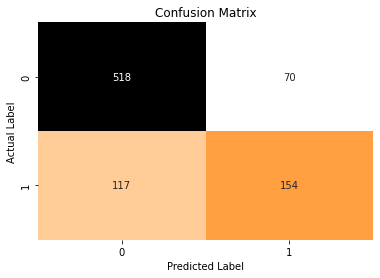

In [154]:
confusion_matrix(test_labels,ytest_predict_r)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_r),annot=True, fmt='d',cbar=False, cmap='gist_heat_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [143]:
print(classification_report(train_labels,ytrain_predict_r))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.72      0.58      0.64       643

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.79      0.78      2002



In [144]:
print(classification_report(test_labels,ytest_predict_r))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.69      0.57      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.78      0.78      0.78       859



AUC: 0.843


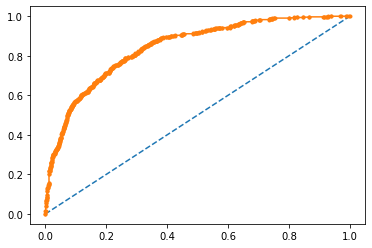

In [145]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.815


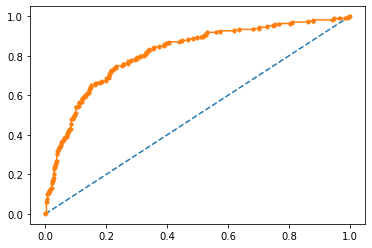

In [147]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
Testing underperforming than training data

##ANN


In [53]:
from sklearn.preprocessing import StandardScaler

In [59]:
sc = StandardScaler()

<function matplotlib.pyplot.show(close=None, block=None)>

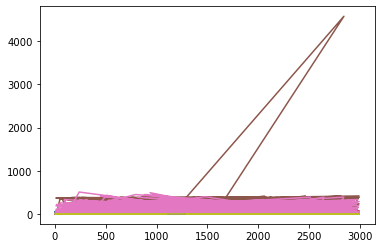

In [162]:
plt.plot(X_train)
plt.show

In [60]:
x_train_a = sc.fit_transform(X_train)

In [61]:
x_train_a

array([[ 2.88764239, -1.2626112 , -1.19813318, ..., -0.65375471,
        -1.31338076, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.37032806,
         0.24339146, -0.44775345],
       [ 2.04101412, -0.27289013,  0.83463176, ...,  0.11574864,
         0.24339146,  1.24676906],
       ...,
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.68209737,
        -0.53499465, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146,  1.24676906]])

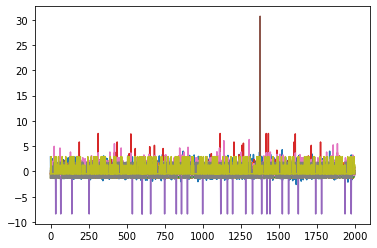

In [62]:
x_test_a = sc.transform(X_test)

In [63]:
x_test_a

array([[-0.68701032, -0.27289013,  0.83463176, ...,  0.50829455,
         0.24339146, -0.44775345],
       [ 2.79357258,  0.71683095,  0.83463176, ..., -0.45535606,
        -0.53499465, -0.44775345],
       [ 0.34775757, -1.2626112 , -1.19813318, ...,  0.32406723,
         1.80016368, -0.44775345],
       ...,
       [ 1.19438584, -1.2626112 , -1.19813318, ..., -0.63958338,
        -1.31338076, -0.44775345],
       [ 1.38252546,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345]])

In [64]:
from sklearn.neural_network import MLPClassifier

Model is built

In [190]:
#clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     #solver='sgd', verbose=True,  random_state=1,tol=0.01)

The model is trained with training data

In [203]:
# Fit the model on the training data
#clf.fit(x_train_a, train_labels)


Iteration 1, loss = 0.73190837
Iteration 2, loss = 0.70481792
Iteration 3, loss = 0.67377635
Iteration 4, loss = 0.64619493
Iteration 5, loss = 0.62272050
Iteration 6, loss = 0.60330312
Iteration 7, loss = 0.58732722
Iteration 8, loss = 0.57422514
Iteration 9, loss = 0.56310857
Iteration 10, loss = 0.55382489
Iteration 11, loss = 0.54599742
Iteration 12, loss = 0.53911871
Iteration 13, loss = 0.53336114
Iteration 14, loss = 0.52840135
Iteration 15, loss = 0.52391493
Iteration 16, loss = 0.51999654
Iteration 17, loss = 0.51649752
Iteration 18, loss = 0.51346348
Iteration 19, loss = 0.51075176
Iteration 20, loss = 0.50823319
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1,
              solver='sgd', tol=0.01, verbose=True)

In [206]:
# use the model to predict the training data
#y_pred_a = clf.predict(x_train_a)

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid_a = {
    'hidden_layer_sizes': [100,500],
    'max_iter': [5000,2500],
    'solver': ['sgd','adam'],
    'tol': [0.01],
}

nncl = MLPClassifier(random_state=1)

grid_search_a = GridSearchCV(estimator = nncl, param_grid = param_grid_a, cv = 3)

In [66]:
grid_search_a.fit(x_train_a, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 500],
                         'max_iter': [5000, 2500], 'solver': ['sgd', 'adam'],
                         'tol': [0.01]})

In [67]:
grid_search_a.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}

In [71]:
best_grid_a = grid_search_a.best_estimator_

In [72]:
best_grid_a

MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1, tol=0.01)

In [178]:
ytrain_predict_a = best_grid_a.predict(x_train_a)
ytest_predict_a = best_grid_a.predict(x_test_a)

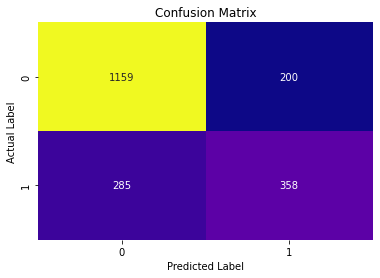

In [181]:
confusion_matrix(train_labels,ytrain_predict_a)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict_a),annot=True, fmt='d',cbar=False, cmap='plasma')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

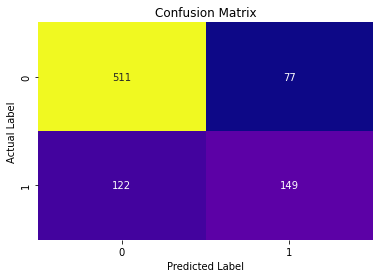

In [183]:
confusion_matrix(test_labels,ytest_predict_a)
sns.heatmap(confusion_matrix(test_labels,ytest_predict_a),annot=True, fmt='d',cbar=False, cmap='plasma')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [186]:
print(classification_report(train_labels,ytrain_predict_a))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1359
           1       0.64      0.56      0.60       643

    accuracy                           0.76      2002
   macro avg       0.72      0.70      0.71      2002
weighted avg       0.75      0.76      0.75      2002



In [187]:
print(classification_report(test_labels,ytest_predict_a))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       588
           1       0.66      0.55      0.60       271

    accuracy                           0.77       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.76      0.77      0.76       859



AUC: 0.792


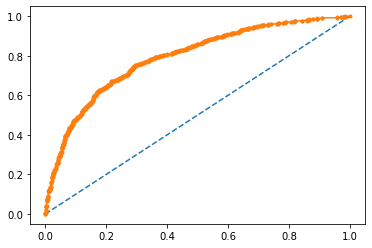

In [189]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_a.predict_proba(x_train_a)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.798


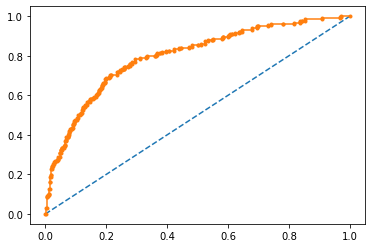

In [191]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_a.predict_proba(x_test_a)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')